In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

# Quiz 2 - Get Hyp'

<ul>
<li> Use this as a starting point for your work, but answer the questions on Moodle. 
<li> Publish this to your GitHub and submit the link in the question on Moodle. 
</ul>

## Potentially Useful Information

#### Data Dictionary
<ul>
<li>credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
<li>purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
<li>int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
<li>installment: The monthly installments owed by the borrower if the loan is funded.
<li>log.annual.inc: The natural log of the self-reported annual income of the borrower.
<li>dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
<li>fico: The FICO credit score of the borrower.
<li>days.with.cr.line: The number of days the borrower has had a credit line.
<li>revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
<li>revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
<li>inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
<li>not.fully.paid: 1 if the borrower failed to repay their loan, 0 if they have not failed
</ul>

#### FICO Score Groups

![FICO](fico_range.png "FICO Ranges")

#### Note on ANOVA - Might be Useful, Might Not

> @JeremyMiles is right. First, there's a rule of thumb that the ANOVA is robust to heterogeneity of variance so long as the largest variance is not more than 4 times the smallest variance. Furthermore, the general effect of heterogeneity of variance is to make the ANOVA less efficient. That is, you would have lower power. Since you have a significant effect anyway, there is less reason to be concerned here. 
- https://stats.stackexchange.com/questions/56971/alternative-to-one-way-anova-unequal-variance

In [2]:
# Please don't alter this part. 
df = pd.read_csv("loan_data.csv")
df.drop(columns={"delinq.2yrs", "pub.rec"}, inplace=True)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,0


### Visualize/Explore Data - If You Want, You Do You

## Solutions

Question 1-3

In [8]:
#get the data
fail=df[df['not.fully.paid']==1]
notfail=df[df['not.fully.paid']==0]
fail1=fail['fico']
notfail1=notfail['fico']

In [11]:
stat, pval = ss.ttest_ind(fail1, notfail1)
stat, pval



(-14.812743547869088, 4.227100096647354e-49)

In [ ]:
cutoff = .05
if pval < cutoff:
    print("Reject null hypothesis - Effect appears significant")
else:
    print("Accept null hypothesis - Effect may be due to random chance")

Question 4-5

In [17]:
#get the data
w=df[df['credit.policy']==1]
n=df[df['credit.policy']==0]
w1=fail['fico']
n1=notfail['fico']

In [18]:
stat, pval1 = ss.ttest_ind(w1, n1)
stat, pval1

(-14.812743547869088, 4.227100096647354e-49)

In [19]:
cutoff = .05
if pval1 < cutoff:
    print("Reject null hypothesis - Effect appears significant")
else:
    print("Accept null hypothesis - Effect may be due to random chance")

Reject null hypothesis - Effect appears significant


Question 6-8

In [20]:
w=df[df['credit.policy']==1]
n=df[df['credit.policy']==0]
w2=fail['log.annual.inc']
n2=notfail['log.annual.inc']

In [23]:
stat, pval3 = ss.ttest_ind(w2, n2)
stat, pval3

(-3.2741094137442324, 0.0010637173827583485)

In [24]:
cutoff = .05
if pval3 < cutoff:
    print("Reject null hypothesis - Effect appears significant")
else:
    print("Accept null hypothesis - Effect may be due to random chance")

Reject null hypothesis - Effect appears significant


In [25]:
#Get some basic stats
meanw2, stdw2, varw2, nw2 = w2.mean(), w2.std(), w2.var(), w2.count()
print(meanw2, stdw2, varw2, nw2)
meann2, stdn2, varn2, nn2 = n2.mean(), n2.std(), n2.var(), n2.count()
print(meann2, stdn2, varn2, nn2)

10.885022624600072 0.6667176278739881 0.4445123953179177 1533
10.941091145101165 0.6040447250041121 0.36487002980529337 8045


In [27]:
#Statsmodels calculation of power. 
from statsmodels.stats.power import TTestPower
powerTest = TTestPower()

#Statsmodels calculation of power. 
ces2 = thinkstats2.CohenEffectSize(w2, n2)
alpha2 = .05
nobs2 = nw2 + nn2

pow2 = powerTest.power(effect_size=ces2, nobs=nobs2, alpha=alpha2)
pow2, ces2


(1.0, -0.09124167545651826)

In [28]:
n = powerTest.solve_power(ces2, power=.85, nobs=None, alpha=alpha2)
n


1080.4018791431763

Question 9-11

In [31]:
money=np.exp(df['log.annual.inc'])
MEAN=money.mean()
print(MEAN)

68402.03071015503


In [35]:
from scipy.stats import skew

print(skew(money,axis=0,bias=True))
print(skew(df['days.with.cr.line'],axis=0,bias=True))
print(skew(df['fico'],axis=0,bias=True))

9.592046489493258
1.1555672187692227
0.47118593325420144


Question 12-14

In [46]:
exceptional=df[df['fico'].between(800,850)]
verygood=df[df['fico'].between(740,799)]
good=df[df['fico'].between(670,739)]
fair=df[df['fico'].between(580,669)]
poor=df[df['fico'].between(300,579)]

In [ ]:
from scipy.stats import skew

print(skew(money,axis=0,bias=True))
print(skew(df['days.with.cr.line'],axis=0,bias=True))
print(skew(df['fico'],axis=0,bias=True))

9.592046489493258
1.1555672187692227
0.47118593325420144


<AxesSubplot:xlabel='fico', ylabel='Density'>

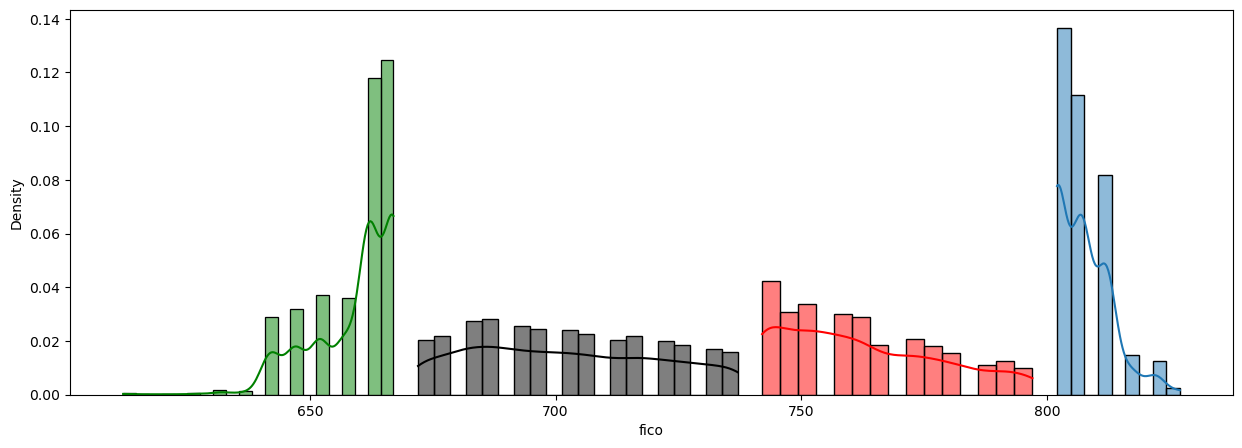

In [53]:
sns.histplot(exceptional['fico'], kde=True, stat="density")
sns.histplot(verygood['fico'], kde=True, stat="density", color='red')
sns.histplot(good['fico'], kde=True, stat="density", color='black')
sns.histplot(fair['fico'], kde=True, stat="density", color='green')
sns.histplot(poor['fico'],kde=True,stat='density',color='orange')

In [45]:
varStat,varP=ss.levene(exceptional['fico'],verygood['fico'],good['fico'],fair['fico'],poor['fico'])
stat,pval=ss.f_oneway(exceptional['fico'],verygood['fico'],good['fico'],fair['fico'],poor['fico'])
stat,pval

c:\Users\yuwei\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\yuwei\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\yuwei\anaconda3\lib\site-packages\scipy\stats\stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


(nan, nan)

In [61]:
print('exceptinal:',exceptional['fico'].count()/df['fico'].count()*100)
print('verygood:',verygood['fico'].count()/df['fico'].count()*100)
print('good:',good['fico'].count()/df['fico'].count()*100)
print('fair:',fair['fico'].count()/df['fico'].count()*100)
print('poor:',poor['fico'].count()/df['fico'].count()*100)

exceptinal: 1.5138859887241596
verygood: 21.768636458550848
good: 62.716642305282946
fair: 14.000835247442053
poor: 0.0


Question 15-16

In [70]:
#income
inter1, slope1 = thinkstats2.LeastSquares(df['log.annual.inc'], df['fico']) # Calculate model
res1 = thinkstats2.Residuals(df['log.annual.inc'], df['fico'], inter, slope) # Make residual list. Used later, not needed now. 
regLine1 = thinkstats2.FitLine(df['log.annual.inc'], inter, slope) # Generate line for plotting. 
print("Y intercept1:", inter)
print("Slope1:", slope)

#intrest rate
inter2, slope2 = thinkstats2.LeastSquares(df['int.rate'], df['fico']) # Calculate model
res2 = thinkstats2.Residuals(df['int.rate'], df['fico'], inter2, slope2) # Make residual list. Used later, not needed now. 
regLine2 = thinkstats2.FitLine(df['int.rate'], inter2, slope2) # Generate line for plotting. 
print("Y intercept2:", inter2)
print("Slope2:", slope2)

#revol.util
inter3, slope3 = thinkstats2.LeastSquares(df['revol.util'], df['fico']) # Calculate model
res3 = thinkstats2.Residuals(df['revol.util'], df['fico'], inter3, slope3) # Make residual list. Used later, not needed now. 
regLine3 = thinkstats2.FitLine(df['revol.util'], inter3, slope3) # Generate line for plotting. 
print("Y intercept3:", inter3)
print("Slope3:", slope3)



Y intercept1: 633.4889563931449
Slope1: 7.076155249932006
Y intercept2: 834.8346146228581
Slope2: -1010.9934681265686
Y intercept3: 743.9976573291228
Slope3: -0.7083735947431444


In [67]:
#Calculate RMSE from residuals
def rmseFromResiduals(residuals):
    SSE = 0
    for i in range(len(residuals)):
        SSE += (residuals[i]**2)
    MSE = SSE/len(residuals)
    return math.sqrt(MSE)


In [71]:
print('income:',rmseFromResiduals(res1))
print('Intrest Rate:',rmseFromResiduals(res2))
print('revol.util:',rmseFromResiduals(res3))

income: 37.71851274212488
Intrest Rate: 26.551703018057946
revol.util: 31.925343195467786
